In [97]:
import numpy as np
import prtools as pr
import matplotlib.pyplot as plt

# Ex. 1.9.a

Boomerangs 100 by 3 prdataset with 2 classes: [50 50]


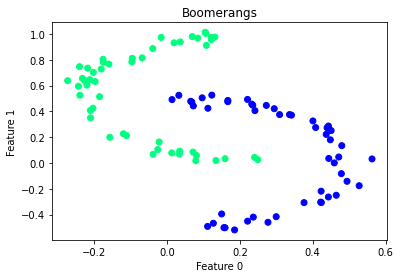

In [2]:
a = pr.boomerangs(n=100)
print(a)
pr.scatterd(a[:, 0:2])
#pr.scatterd(a[:, 1:3])

# Ex. 1.10.a

Error: 0.05


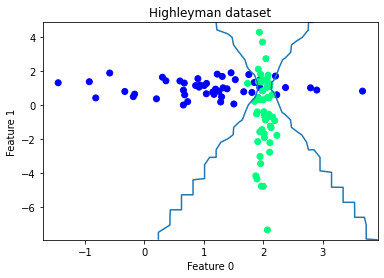

In [51]:
a = pr.gendath()
c = pr.qdc()
c.train(a)
b = c.eval(a)
e = pr.testc(b)
print("Error:", e)
pr.scatterd(a)
pr.plotc(c)

# Ex.1.13

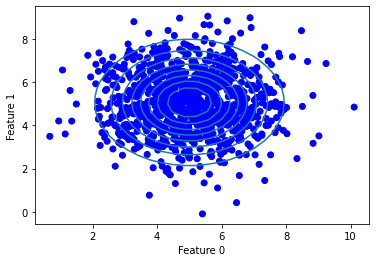

In [53]:
x, y = np.random.multivariate_normal([5,5], [[2,0], [0,2]], 1000).T
a = np.vstack((x,y)).T
a = pr.prdataset(a)
pr.scatterd(a)
w = pr.gaussm(a)
pr.plotm(w)

# Ex.1.15

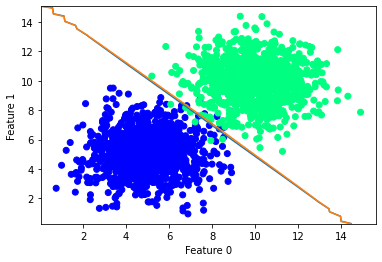

In [146]:
samples = 1000
x1, y1 = np.random.multivariate_normal([5,5], [[2,0], [0,2]], samples).T
x2, y2 = np.random.multivariate_normal([10,10], [[2,0], [0,2]], samples).T
a1 = np.vstack((x1,y1)).T; a2 = np.vstack((x2,y2)).T
a = np.concatenate((a1,a2))
labels = np.concatenate((np.zeros(samples), np.ones(samples))).T
a = pr.prdataset(a, labels)
pr.scatterd(a)
wl = pr.ldc()
wq = pr.qdc()
wl.train(a); wq.train(a)
pr.plotc(wl)
pr.plotc(wq)

As number of samples increase, the ldc and qdc converge to same boundaries.

# Ex.1.16

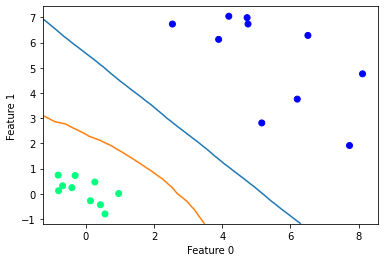

In [145]:
samples=10
x1, y1 = np.random.multivariate_normal([5,5], [[2,0], [0,2]], samples).T
a1 = np.vstack((x1,y1)).T; a2 = np.random.uniform(low=-1,high=1,size=(samples,2))
a = np.concatenate((a1,a2))
labels = np.concatenate((np.zeros(samples), np.ones(samples))).T
a = pr.prdataset(a, labels)
pr.scatterd(a)
wl = pr.ldc()
wq = pr.qdc()
wl.train(a); wq.train(a)
pr.plotc(wl)
pr.plotc(wq)

# Ex 1.17

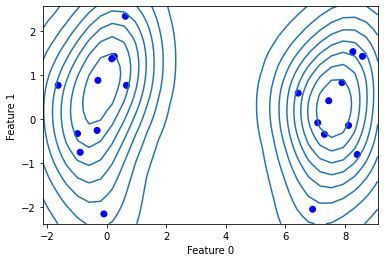

In [113]:
h=1
a = pr.gendats([10,10],2,8)
a = pr.prdataset(+a)
w = pr.parzenm(a, h)
pr.scatterd(a); pr.plotm(w)

# Ex.1.18

In [120]:
a = pr.gendats([20,20],2,8)                 # Generate data
a = pr.prdataset(+a)
hs = [0.01,0.05,0.1,0.25,0.5,1,1.5,2,3,4,5,6,7,8,9,10] # Array of h’s to try
LL = np.zeros(len(hs))
for i in range(len(hs)):                    # For each h..
    w = pr.parzenm(a,hs[i])                 #   estimate Parzen density
    LL[i] = np.sum(np.log(+(a*w)));         #   calculate log-likelihood

In [124]:
+(a*w)

array([[0.17744163],
       [0.18565182],
       [0.13327727],
       [0.1686327 ],
       [0.14400767],
       [0.17399849],
       [0.1487088 ],
       [0.14997117],
       [0.14923692],
       [0.14522253],
       [0.15388495],
       [0.10396895],
       [0.13783819],
       [0.13165139],
       [0.15660249],
       [0.16837517],
       [0.18832654],
       [0.15238013],
       [0.19100174],
       [0.19926609],
       [0.25102448],
       [0.24378465],
       [0.24520832],
       [0.23739714],
       [0.24825447],
       [0.22508673],
       [0.21991232],
       [0.21940001],
       [0.2456042 ],
       [0.21931542],
       [0.24588281],
       [0.21510245],
       [0.2512117 ],
       [0.24432983],
       [0.24464982],
       [0.2482673 ],
       [0.24674503],
       [0.25276084],
       [0.23953575],
       [0.25099795]])

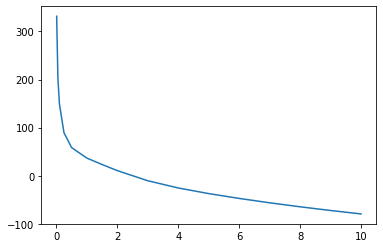

In [121]:
plt.plot(hs, LL)

# Ex.1.19

C:\Users\Anuj\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in log
  if __name__ == '__main__':


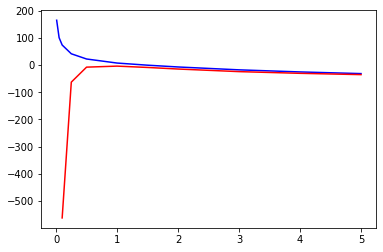

In [123]:
[trn,tst] = pr.gendat(a,0.5)           # Split into trn and tst, both 50%
hs = [0.01,0.05,0.1,0.25,0.5,1,1.5,2,3,4,5] # Array of h’s to try
Ltrn = np.zeros(len(hs))
Ltst = np.zeros(len(hs))
for i in range(len(hs)):                 # For each h...
    w = pr.parzenm(trn,hs[i])             #   estimate Parzen density
    Ltrn[i] = np.sum(np.log(+(trn*w)))    #   calculate trn log-likelihood
    Ltst[i] = np.sum(np.log(+(tst*w)))    #   calculate tst log-likelihood
plt.plot(hs,Ltrn,'b-')             # Plot trn log-likelihood as function of h
plt.plot(hs,Ltst,'r-')             # Plot tst log-likelihood as function of h

h=0.5 (min h) is a case of overfitting on training data. Introducing test dataset shows that h=1 is the best fit due to fitting on unseen data too.

# Ex.1.20

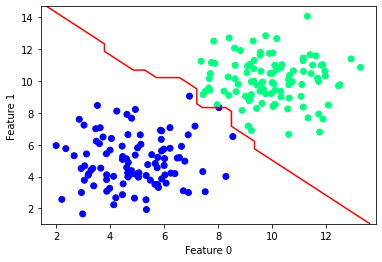

In [180]:
samples=100
x1, y1 = np.random.multivariate_normal([5,5], [[2,0], [0,2]], samples).T
x2, y2 = np.random.multivariate_normal([10,10], [[2,0], [0,2]], samples).T
a1 = np.vstack((x1,y1)).T; a2 = np.vstack((x2,y2)).T
a = np.concatenate((a1,a2))
labels = np.concatenate((np.zeros(samples), np.ones(samples))).T
a = pr.prdataset(a, labels)
wl = pr.ldc(); wq = pr.qdc(); wn = pr.nmc(); wf = pr.fisherc(); wp = pr.parzenc(); wk = pr.knnc()
wl.train(a); wq.train(a); wn.train(a); wf.train(a); wp.train(a); wk.train(a)
pr.scatterd(a)
pr.plotc(wk, colors='red')

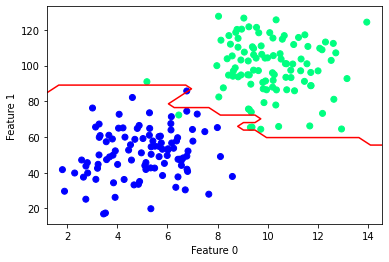

In [179]:
samples=100
x1, y1 = np.random.multivariate_normal([5,5], [[2,0], [0,2]], samples).T
x2, y2 = np.random.multivariate_normal([10,10], [[2,0], [0,2]], samples).T
a1 = np.vstack((x1,y1)).T; a2 = np.vstack((x2,y2)).T
a = np.concatenate((a1,a2))
a[:,1] = 10*a[:,1] # stretching y axis
labels = np.concatenate((np.zeros(samples), np.ones(samples))).T
a = pr.prdataset(a, labels)
wl = pr.ldc(); wq = pr.qdc(); wn = pr.nmc(); wf = pr.fisherc(); wp = pr.parzenc(); wk = pr.knnc()
wl.train(a); wq.train(a); wn.train(a); wf.train(a); wp.train(a); wk.train(a)
pr.scatterd(a)
pr.plotc(wk, colors='red')

KNN and NMC suffer the most due to the stretching along one axis. Others estimate density or the covariance matrix, thus estimate the stretching too. KNN and NMC directly estimate the boundary, thus suffer.